# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [14]:
df = pd.read_csv('Dataset_Clustering.csv')
df

,TransactionAmount,TransactionType,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,70,Doctor,1,5112.21,2
1,376.24,Debit,68,Doctor,1,13758.91,4
2,126.29,Debit,19,Student,1,1122.35,1
3,184.50,Debit,26,Student,1,8569.06,1
4,13.45,Credit,26,Student,1,7429.40,1
...,...,...,...,...,...,...,...
2507,856.21,Credit,33,Doctor,1,12690.79,4
2508,251.54,Debit,48,Doctor,1,254.75,2
2509,28.63,Debit,56,Retired,1,3382.91,3
2510,185.97,Debit,23,Student,1,1776.91,1


In [15]:
label_encoder = LabelEncoder()

# Encode 'TransactionType' dan 'CustomerOccupation'
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])
df

,TransactionAmount,TransactionType,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,1,70,0,1,5112.21,2
1,376.24,1,68,0,1,13758.91,4
2,126.29,1,19,3,1,1122.35,1
3,184.50,1,26,3,1,8569.06,1
4,13.45,0,26,3,1,7429.40,1
...,...,...,...,...,...,...,...
2507,856.21,0,33,0,1,12690.79,4
2508,251.54,1,48,0,1,254.75,2
2509,28.63,1,56,2,1,3382.91,3
2510,185.97,1,23,3,1,1776.91,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
# Pisahkan fitur dan target
X = df.drop('Cluster', axis=1)  # 'Cluster' adalah kolom target
y = df['Cluster']  # Target kita adalah 'Cluster'

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data latih dan uji
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (2009, 6)
Testing data size: (503, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**Insight**
- Disini saya menggunakan Random Forest dan XGBoost untuk membandingkan kedua metode klasifikasi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [18]:
# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Prediksi dengan XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00        75

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Random Forest Confusion Matrix:
[[112   0   0   0   0]
 [  0 129   0   0   0]
 [  0   0  49   0   0]
 [  0   0   0 138   0]
 [  0   0   0   0  75]]
XGBoost Accuracy: 0.9980119284294234
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       129
           2       1.00      0.98      0.99        49
           3 

**Insight**
-  Pada metode **Random Forest** maupun **XGBoost** menunjukkan akurasi hampir menyuentuh **100%**, yang menandakan model mengalami overfitting.  
Hal ini terlihat dari confusion matrix, di mana model tidak melakukan kesalahan sama sekali pada data uji.  
- Kemungkinan penyebabnya adalah kompleksitas model yang terlalu tinggi, data leakage, atau jumlah data yang terbatas.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
param_dist_rf = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

best_rf_model = random_search_rf.best_estimator_
print(f"Best Random Forest Params: {random_search_rf.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimat

/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklea

In [20]:
param_dist_xgb = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)

best_xgb_model = random_search_xgb.best_estimator_
print(f"Best XGBoost Params: {random_search_xgb.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=110, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=110, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=110, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=170, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.1s
[

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Prediksi dengan Random Forest dengan best params
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Prediksi dengan XGBoost dengan best params
y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00        75

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Random Forest Confusion Matrix:
[[112   0   0   0   0]
 [  0 129   0   0   0]
 [  0   0  49   0   0]
 [  0   0   0 138   0]
 [  0   0   0   0  75]]
XGBoost Accuracy: 0.9980119284294234
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       129
           2       1.00      0.98      0.99        49
           3 

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Random Forest Cross-Validation Accuracy: 1.0000 +/- 0.0000
XGBoost Cross-Validation Accuracy: 0.9995 +/- 0.0010


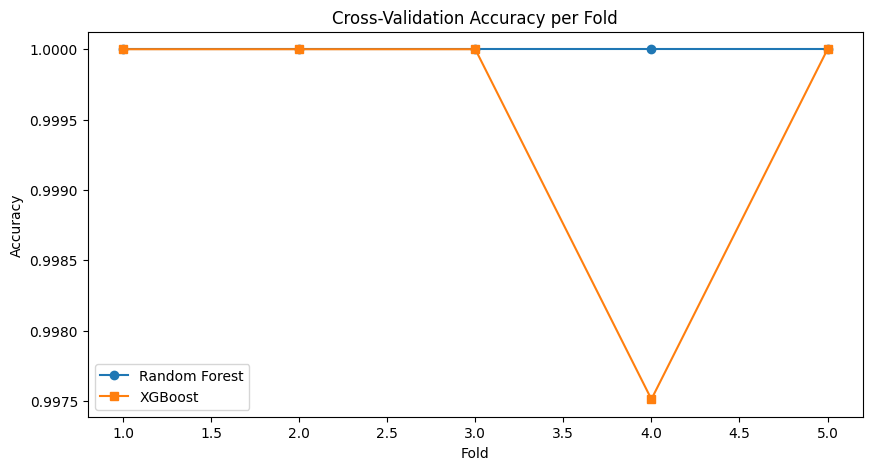

Updated Random Forest Accuracy: 1.0
Updated XGBoost Accuracy: 0.9980119284294234


In [22]:
# Evaluasi dengan Cross-Validation untuk Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores_rf):.4f} +/- {np.std(cv_scores_rf):.4f}")

# Evaluasi dengan Cross-Validation untuk XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=5)
print(f"XGBoost Cross-Validation Accuracy: {np.mean(cv_scores_xgb):.4f} +/- {np.std(cv_scores_xgb):.4f}")

# Plot Cross-Validation Scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores_rf, marker='o', label='Random Forest')
plt.plot(range(1, 6), cv_scores_xgb, marker='s', label='XGBoost')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.legend()
plt.show()

# Reduksi Overfitting dengan Pruning Random Forest
best_rf_model.set_params(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2)
best_rf_model.fit(X_train, y_train)

# Reduksi Overfitting dengan Regularisasi XGBoost
best_xgb_model.set_params(n_estimators=50, max_depth=6, learning_rate=0.1, reg_lambda=1.0)
best_xgb_model.fit(X_train, y_train)

# Evaluasi ulang setelah overfitting ditangani
y_pred_rf_new = best_rf_model.predict(X_test)
y_pred_xgb_new = best_xgb_model.predict(X_test)

print("Updated Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_new))
print("Updated XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_new))

### **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**  
- **Sebelum Tuning:**  
  - Model Random Forest dan XGBoost menunjukkan **akurasi sangat tinggi** bahkan sebelum dilakukan tuning, masing-masing dengan akurasi 100% dan ~99.80%.  
  - Meskipun terlihat ideal, hasil ini berpotensi menunjukkan **indikasi overfitting**, karena belum dilakukan validasi silang dan tidak terlihat adanya variasi kesalahan.

- **Setelah Tuning:**  
  - **Random Forest Cross-Validation Accuracy:** **1.0000 ± 0.0000**  
  - **XGBoost Cross-Validation Accuracy:** **0.9995 ± 0.0010**  
  - **Updated Random Forest Accuracy (Test Set):** **1.0**  
  - **Updated XGBoost Accuracy (Test Set):** **0.9980**  

> Setelah dilakukan tuning (termasuk pruning dan regularisasi), akurasi tetap berada di tingkat sangat tinggi. Hal ini dapat menandakan model memang sangat cocok dengan data, namun tetap perlu diwaspadai kemungkinan **overfitting ringan** atau **kompleksitas data yang rendah**.


### **2. Identifikasi Kelemahan Model**  

- **Overfitting (Minor):**  
  - Akurasi yang sempurna pada Random Forest dan hampir sempurna pada XGBoost menunjukkan bahwa model mungkin **terlalu hafal terhadap data latih**, meskipun regularisasi sudah dilakukan.

- **Kurangnya Variasi Error:**  
  - Pada Random Forest, **tidak ada kesalahan klasifikasi sama sekali** (confusion matrix diagonal sempurna).  
  - Pada XGBoost, hanya terjadi **1 kesalahan klasifikasi minor** pada kelas ke-3 (Cluster 2), mengindikasikan performa sangat kuat namun belum sepenuhnya generalisasi.

- **Kemungkinan Data Mudah Diklasifikasi atau Tidak Seimbang:**  
  - Hasil klasifikasi yang hampir sempurna bisa menjadi tanda bahwa **fitur sangat memisahkan antar kelas**, atau mungkin terdapat **feature leakage** atau **fitur dominan** yang terlalu kuat mempengaruhi hasil klasifikasi.


### **3. Rekomendasi Tindakan Lanjutan**  

1. **Tambah Variasi Dataset**  
   - Perlu dilakukan penambahan data untuk mencakup **lebih banyak variasi kasus nyata**, terutama data dengan distribusi yang lebih seimbang atau kasus-kasus borderline.

2. **Cek Potensi Data Leakage**  
   - Pastikan tidak ada **informasi target yang secara tidak sengaja masuk ke fitur**, terutama jika data merupakan hasil transformasi atau penggabungan dari proses clustering sebelumnya.

3. **Perkuat Regularisasi dan Kurangi Kompleksitas**  
   - **Random Forest:**  
     - Gunakan `max_depth` yang lebih kecil, seperti **5–8**, untuk membatasi kompleksitas pohon.  
     - Gunakan `max_features='sqrt'` atau `max_features=0.5` untuk mengurangi korelasi antar pohon.  
   - **XGBoost:**  
     - Tambahkan `reg_alpha=0.5` (L1 regularization) untuk mengurangi kemungkinan overfit.  
     - Gunakan `subsample=0.8` dan `colsample_bytree=0.8` untuk memperkenalkan variasi antar pohon.

4. **Feature Engineering Lanjutan**  
   - Analisis **feature importance** dan gunakan **SHAP analysis** untuk mengevaluasi kontribusi tiap fitur.  
   - Pertimbangkan untuk menggunakan **Principal Component Analysis (PCA)** atau melakukan **filtering fitur yang saling berkorelasi tinggi**.

5. **Bandingkan dengan Model Sederhana**  
   - Lakukan uji pembanding dengan **Logistic Regression** atau **Decision Tree sederhana**. Jika hasilnya tetap tinggi, ini dapat mengonfirmasi bahwa **dataset mudah dipisahkan**.


### **Kesimpulan**  
Model Random Forest dan XGBoost berhasil mencapai **performansi klasifikasi yang nyaris sempurna** baik sebelum maupun setelah tuning. Namun, ketepatan yang terlalu tinggi ini bisa menjadi sinyal adanya **overfitting ringan** atau bahwa data tersebut **terlalu mudah dipelajari oleh model**.  
Langkah-langkah lanjutan seperti menambah variasi data, memverifikasi tidak adanya data leakage, memperkuat regularisasi, dan mencoba model yang lebih sederhana perlu dilakukan agar model yang dibangun dapat **berkinerja optimal saat diterapkan ke data dunia nyata**.